In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("timeseries.csv")

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.columns = ["month","sales"]

In [ ]:
df.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [ ]:
df['month'] = pd.to_datetime(df['month'])

In [ ]:
df.head()

,month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('month',inplace = True)

In [ ]:
df.head()

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
import matplotlib.pyplot as plt

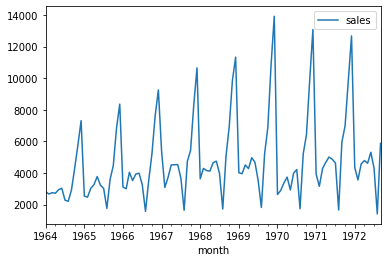

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_results = adfuller(df['sales'])

In [ ]:
test_results

(-1.8335930563276228,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

p = 0.36, p should be <0.05 for stationary data hence it isn't stationary

In [ ]:
df['salesfd'] = df['sales'] - df['sales'].shift(1)

In [ ]:
df.head()

,sales,salesfd
month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


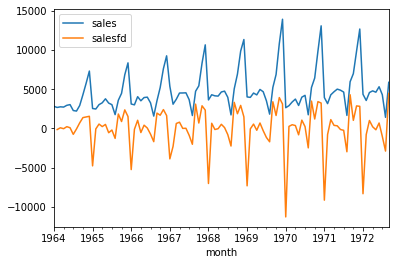

In [ ]:
df.plot()

In [ ]:
test_results_1 = adfuller(df['salesfd'].dropna())

In [ ]:
test_results_1

(-7.189896448050998,
 2.519620447387099e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '10%': -2.583823615311909,
  '5%': -2.893507960466837},
 1466.826726291589)

p is still <0.05 but the data is seasonal with seasonality as 12

In [ ]:
df['salessd'] = df['sales'] - df['sales'].shift(12)

In [ ]:
df.head()

,sales,salesfd,salessd
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


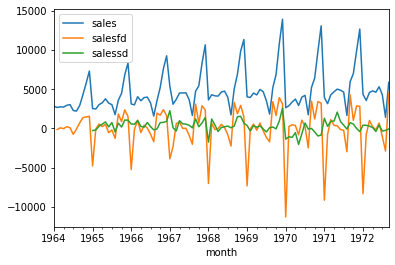

In [ ]:
df.plot()

In [ ]:
test_results_2 = adfuller(df['salessd'].dropna())

In [ ]:
test_results_2

(-7.626619157213164,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '10%': -2.583823615311909,
  '5%': -2.893507960466837},
 1294.7753384560438)

In [ ]:
from pandas.plotting import autocorrelation_plot

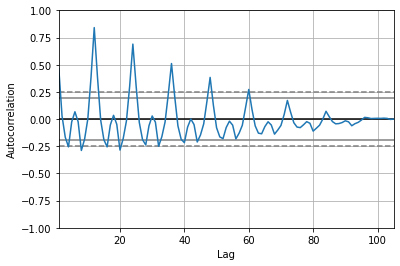

In [ ]:
autocorrelation_plot(df['sales'])

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

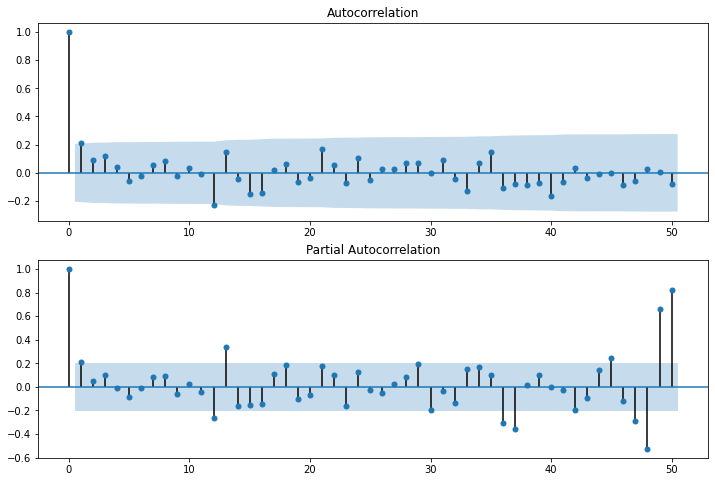

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['salessd'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['salessd'].iloc[13:],lags=50,ax=ax2)

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


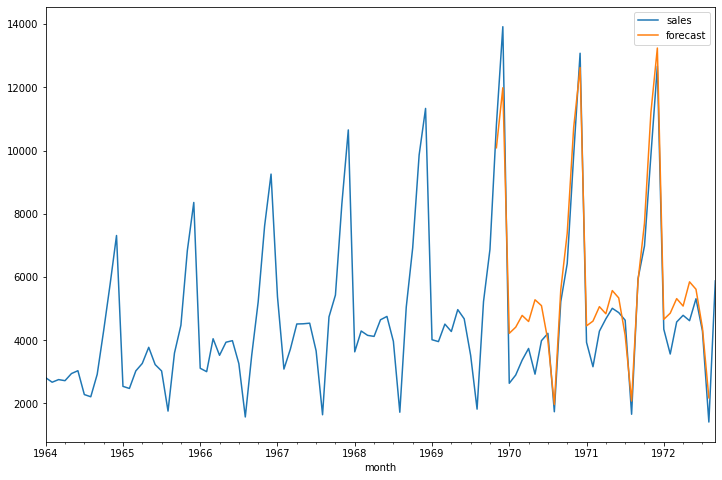

In [ ]:
df['forecast']=results.predict(start=70,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_df=pd.concat([df,future_datest_df])

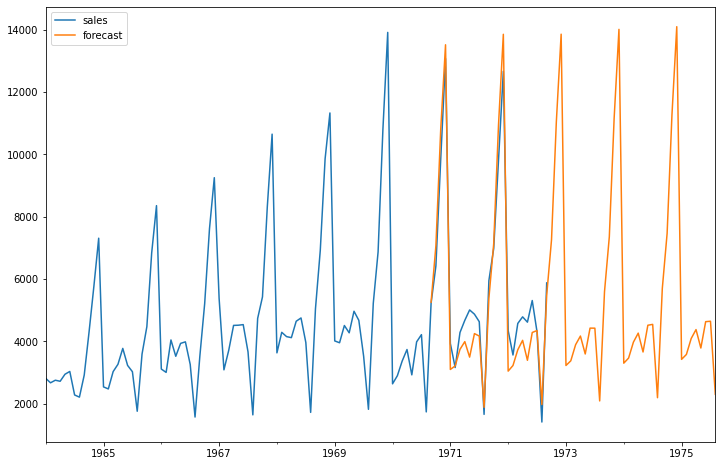

In [ ]:
future_df['forecast'] = results.predict(start = 80, end = 140, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8)) 